In [3]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [9]:
# Step 2: Load Dataset
df = pd.read_csv(r"C:\Users\91808\Downloads\glass.csv")
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [10]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [12]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [13]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

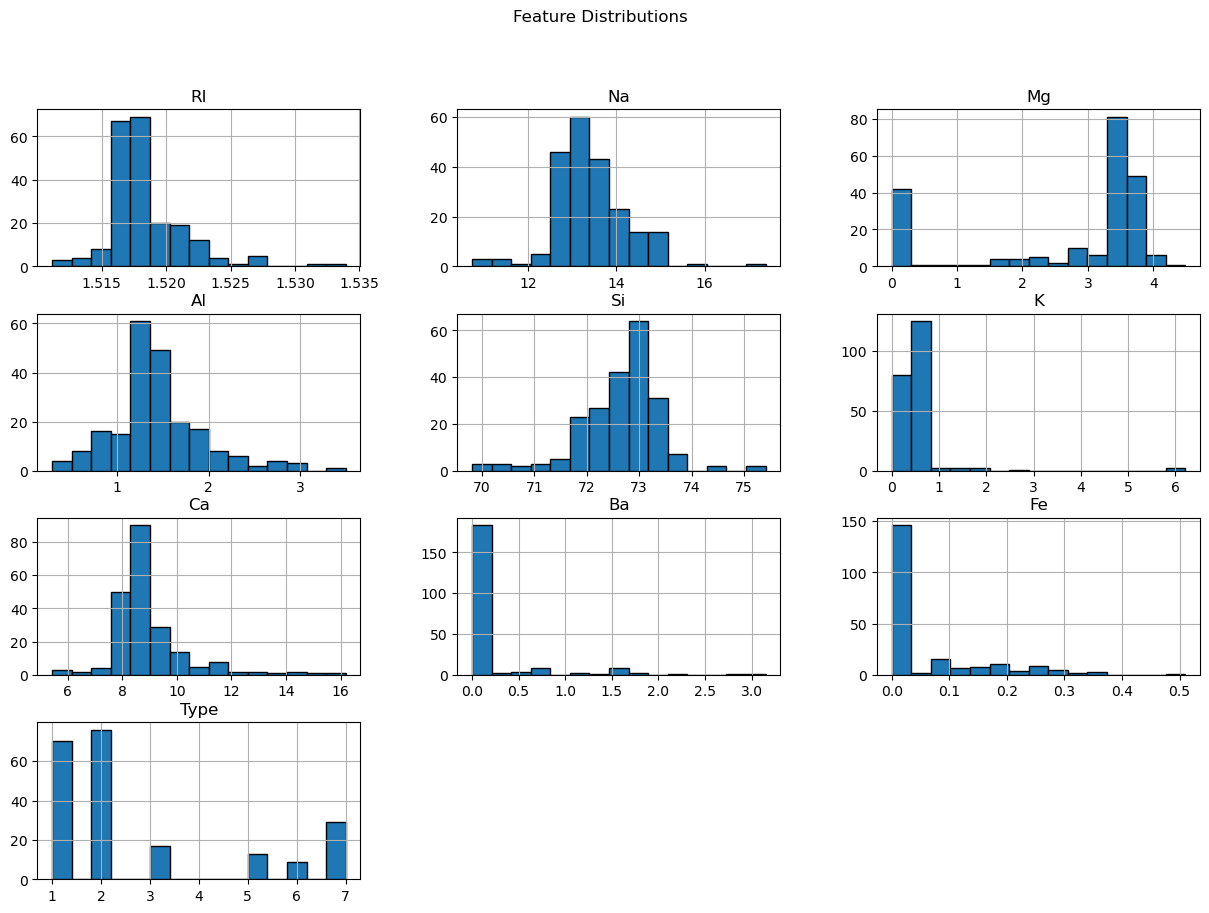

In [14]:
# Step 4: Visualizations
# Histograms
df.hist(figsize=(15, 10), bins=15, edgecolor='black')
plt.suptitle("Feature Distributions")
plt.show()

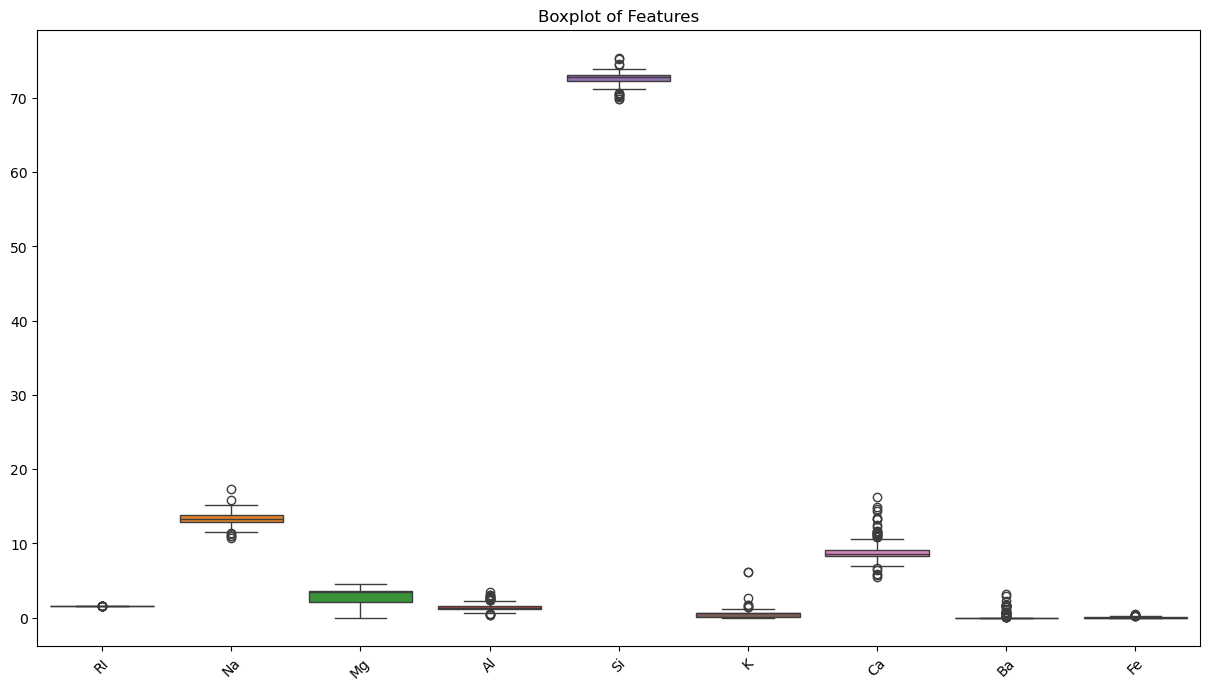

In [15]:
# Boxplots
plt.figure(figsize=(15, 8))
sns.boxplot(data=df.drop(columns=['Type']))
plt.title("Boxplot of Features")
plt.xticks(rotation=45)
plt.show()

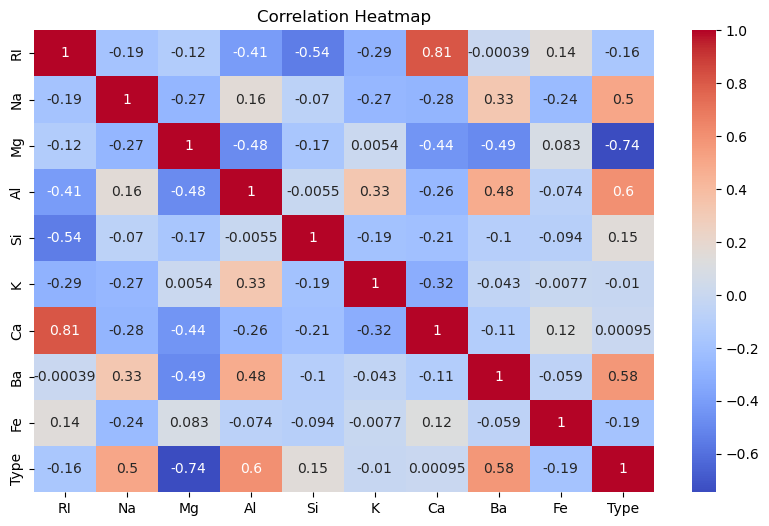

In [16]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [17]:
# Step 5: Data Preprocessing
X = df.drop("Type", axis=1)
y = df["Type"]

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [18]:
# Step 6: Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Accuracy: 0.813953488372093
Classification Report:
               precision    recall  f1-score   support

           1       0.75      0.86      0.80        14
           2       0.85      0.73      0.79        15
           3       0.67      0.67      0.67         3
           5       1.00      0.67      0.80         3
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         6

    accuracy                           0.81        43
   macro avg       0.82      0.82      0.81        43
weighted avg       0.83      0.81      0.81        43

Confusion Matrix:
 [[12  1  1  0  0  0]
 [ 3 11  0  0  1  0]
 [ 1  0  2  0  0  0]
 [ 0  1  0  2  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  6]]


In [19]:
# Step 7: Bagging Classifier
bagging = BaggingClassifier(random_state=42)
bagging.fit(X_train, y_train)
y_pred_bag = bagging.predict(X_test)

print("Bagging Accuracy:", accuracy_score(y_test, y_pred_bag))
print("Classification Report:\n", classification_report(y_test, y_pred_bag))

Bagging Accuracy: 0.6976744186046512
Classification Report:
               precision    recall  f1-score   support

           1       0.71      0.71      0.71        14
           2       0.67      0.67      0.67        15
           3       1.00      0.67      0.80         3
           5       0.67      0.67      0.67         3
           6       0.50      0.50      0.50         2
           7       0.71      0.83      0.77         6

    accuracy                           0.70        43
   macro avg       0.71      0.67      0.69        43
weighted avg       0.70      0.70      0.70        43



In [23]:
# Step 8: Boosting (AdaBoost)
boosting = AdaBoostClassifier(n_estimators=100, random_state=42)
boosting.fit(X_train, y_train)
y_pred_boost = boosting.predict(X_test)

print("Boosting Accuracy:", accuracy_score(y_test, y_pred_boost))
print("Classification Report:\n", classification_report(y_test, y_pred_boost))
import warnings
warnings.filterwarnings('ignore')

Boosting Accuracy: 0.5348837209302325
Classification Report:
               precision    recall  f1-score   support

           1       0.54      0.93      0.68        14
           2       0.42      0.33      0.37        15
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       0.50      1.00      0.67         2
           7       1.00      0.50      0.67         6

    accuracy                           0.53        43
   macro avg       0.41      0.46      0.40        43
weighted avg       0.48      0.53      0.48        43



In [ ]:
Additional Notes:
1. Explain Bagging and Boosting methods. How is it different from each other.
Bagging (Bootstrap Aggregating)	
Reduce variance (avoid overfitting)	
Train multiple models independently on random subsets (with replacement)	
Model Training	Parallel (models train simultaneously)	Sequential (models depend on previous)
Example Techniques	Random Forest, Bagged Trees.

Boosting
Reduce bias and variance (build strong learner)
Train models sequentially, each correcting previous errors
Sequential (models depend on previous)
Example AdaBoost, Gradient Boosting, XGBoost

2. Explain how to handle imbalance in the data.

Method	                 How It Helps
Resampling	            -Oversample the minority class (e.g., SMOTE)
                        -Undersample the majority class
Use Different Metrics	 Focus on precision, recall, F1-score instead of just accuracy
Class Weights	         Assign higher weight to the minority class during training
